**SPAM SMS CLASSIFICATION**

In [ ]:
#importing the neccessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#mounting on google drive

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd gdrive/MyDrive/MiniProject

/content/gdrive/MyDrive/MiniProject


In [ ]:
#reading and checking the basic structure of the data
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Dropping the redundant looking columns 
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns for better understanding 
data.rename(columns = {"v1":"Label", "v2":"SMS"}, inplace = True)
data.head()

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# statistical info of dataset
data.describe()

,Label,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# Mapping Values for labels  
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1}) 
data.head(8)

,Label,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...


Text(0, 0.5, 'Number of Data points')

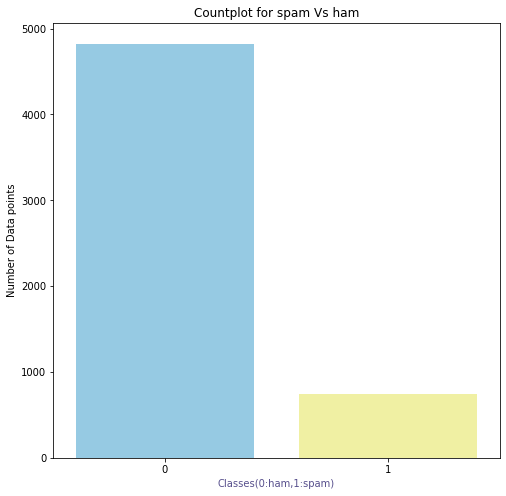

In [ ]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= data["Label"], palette= cols)
fg.set_title("Countplot for spam Vs ham")
fg.set_xlabel("Classes(0:ham,1:spam)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [ ]:
# Creating feature contains_currency_symbol
def currency(x):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in x:
            return 1
    return 0

data['contains_currency_symbol']=data['SMS'].apply(currency)

In [ ]:
# Creating feature contains_number 
def numbers(x):     
    for i in x:         
        if ord(i)>=48 and ord(i)<=57:             
            return 1     
    return 0  
data['contains_number'] = data['SMS'].apply(numbers)

In [ ]:
# creating feature for punctuation containing strings

import string
string.punctuation
'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

import string
regular_punct = list(string.punctuation)
def remove_punctuation(text):
    punct_list='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

data['contains_punct']=data['SMS'].apply(remove_punctuation)

In [ ]:
data['SMS']=data['contains_punct']

In [ ]:
data.head()

,Label,SMS,contains_currency_symbol,contains_number,contains_punct
0,0,Go until jurong point crazy Available only ...,0,0,Go until jurong point crazy Available only ...
1,0,Ok lar Joking wif u oni,0,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,0,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say,0,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives aro...,0,0,Nah I don t think he goes to usf he lives aro...


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data['SMS'], data['Label'], test_size=0.2, random_state=35)

In [ ]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0: 3857, 1: 600})


In [ ]:
# libraries for performing NLP 

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Cleaning the messages
def Cleaning(text):
  corpus = []
  wnl = WordNetLemmatizer()

  for sms_string in list(text):

   # Cleaning special character from the sms
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

   # Converting the entire sms into lower case
    message = message.lower()

    # to remove numeric digits from string
    message = ''.join([i for i in message if not i.isdigit()])

    # Tokenizing the sms by words
    words = message.split()
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

    # Joining the lemmatized words
    message = ' '.join(lemmatized_words)

   # Building a corpus of messages
    corpus.append(message)
  return corpus

In [ ]:
#cleaning training text data, X_train
clean_train=Cleaning(X_train)

In [ ]:
#Changing training text data in to numbers and Creating the Bag of Words model
tfidf = TfidfVectorizer(max_features=500)
X_train_vectors = tfidf.fit_transform(clean_train).toarray()
feature_names = tfidf.get_feature_names()

#Let's have a look at our feature 
X_train_vectors.dtype

dtype('float64')

In [ ]:
#importing libraries for classifers

from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
#cleaning test data, X_test 
clean_test=Cleaning(X_test)

In [ ]:
#Changing testing text data in to numbers and Creating the Bag of Words model

X_test_vectors = tfidf.transform(clean_test).toarray()
feature_names = tfidf.get_feature_names()

#Let's have a look at our feature 
X_test_vectors.dtype

dtype('float64')

In [ ]:
#training multinominalNB
clf_nb=MultinomialNB()
clf_nb.fit(X_train_vectors,y_train)


MultinomialNB()

In [ ]:
#predicting using MultinominalNB
y1_pred=clf_nb.predict(X_test_vectors)
#accuracy and precision
acc_nb=accuracy_score(y_test, y1_pred)
pre_nb=precision_score(y_test, y1_pred)

In [ ]:
#training randomforest
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train_vectors,y_train)


RandomForestClassifier()

In [ ]:
#prediction using randomforest
y2_pred=clf_rf.predict(X_test_vectors)
acc_rf=accuracy_score(y_test, y2_pred)
pre_rf=precision_score(y_test, y2_pred)

In [ ]:
#training decisiontree
clf_dt=DecisionTreeClassifier()
clf_dt.fit(X_train_vectors,y_train)

DecisionTreeClassifier()

In [ ]:
#prediction using decision tree
y3_pred=clf_dt.predict(X_test_vectors)
acc_dt=accuracy_score(y_test, y3_pred)
pre_dt=precision_score(y_test, y3_pred)

In [ ]:
#training svc
clf_svc=SVC()
clf_svc.fit(X_train_vectors,y_train)

SVC()

In [ ]:
#prediction using svc
y4_pred=clf_svc.predict(X_test_vectors)

acc_svc=accuracy_score(y_test, y4_pred)
pre_svc=precision_score(y_test, y4_pred)

In [ ]:
from tabulate import tabulate
info = {'Classifier': ['Naive bayes', 'Decision tree', 'Random forest','SVM'], 'Accuracy': [acc_nb, acc_dt,acc_rf,acc_svc], 'Precision': [pre_nb, pre_dt,pre_rf,pre_svc]}
print(tabulate(info, headers='keys'))

Classifier       Accuracy    Precision
-------------  ----------  -----------
Naive bayes      0.976682     0.941606
Decision tree    0.959641     0.859155
Random forest    0.983857     0.951049
SVM              0.984753     0.977941


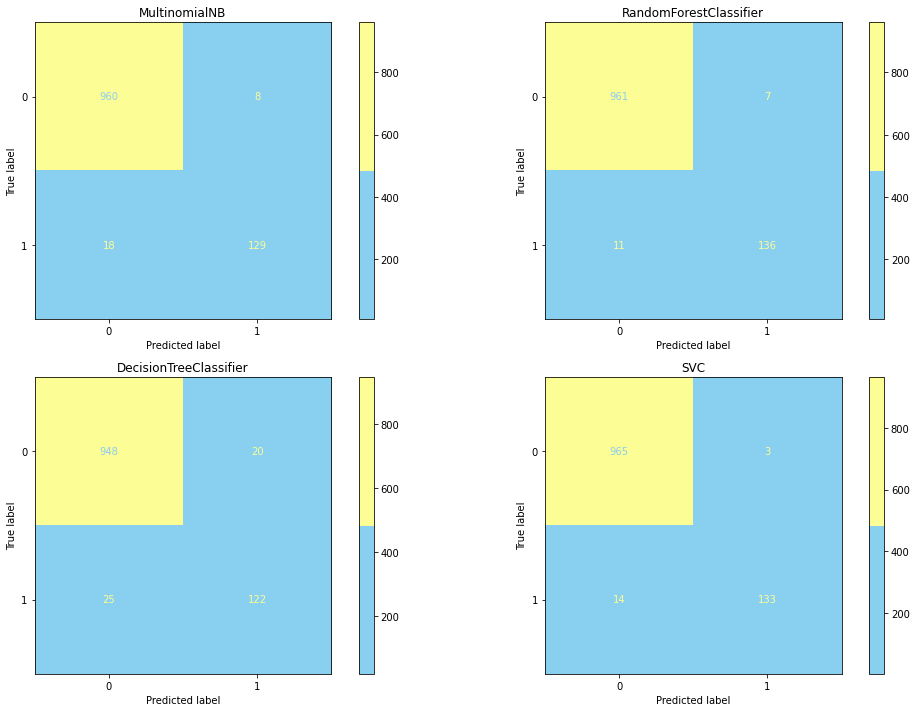

In [ ]:
from matplotlib.colors import ListedColormap
clas=[clf_nb,clf_rf,clf_dt,clf_svc]
cmap = ListedColormap(["#89cff0", "#fdfd96"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(clas, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test_vectors, 
                          y_test, 
                          ax=ax, 
                          cmap= cmap,   
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators=[('nb', clf_nb), ('rf', clf_rf), ('dt', clf_dt), ('svc', clf_svc)]
final_estimator=clf_svc

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train_vectors,y_train)
y_pred = clf.predict(X_test_vectors)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9865470852017937
Precision 0.9647887323943662


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       968
           1       0.96      0.93      0.95       147

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
#give input to check whether it is spam or not
input=['You have won a prize of 10000 call on 1234567890 to claim it',
       'I am waiting where are you',
       'Dear 1234567890, you have won an Amazon gift voucher of rupees 25000',
       'Are you free today, can we go to a movie ',
       'URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U',
       'i will call you later',
       'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!']

In [ ]:
#cleaning the given input
clean_input=Cleaning(input)
print(clean_input)

['prize call claim', 'waiting', 'dear amazon gift voucher rupee', 'free today go movie', 'urgent mobile awarded bonus caller prize final try contact u', 'call later', 'please call customer service representative pm guaranteed cash prize']


In [ ]:
#Changing cleaned given input data in to numbers and Creating the Bag of Words model

X_input_vectors = tfidf.transform(clean_input).toarray()
feature_names = tfidf.get_feature_names()
X_input_vectors.dtype

dtype('float64')

In [ ]:
#check for each classifier by changing res to nb_res,rf_res,dt_res,svc_res for better understanding :
res=clf.predict(X_input_vectors)
for i in range(0,res.size):
  if res[i]==0:
    print(i+1,res[i],'=','ham ',' : ',input[i])
  elif res[i]==1:
    print(i+1,res[i],'=','spam',' : ',input[i])

1 1 = spam  :  You have won a prize of 10000 call on 1234567890 to claim it
2 0 = ham   :  I am waiting where are you
3 1 = spam  :  Dear 1234567890, you have won an Amazon gift voucher of rupees 25000
4 0 = ham   :  Are you free today, can we go to a movie 
5 1 = spam  :  URGENT! Your Mobile No. was awarded å£2000 Bonus Caller Prize on 5/9/03 This is our final try to contact U
6 0 = ham   :  i will call you later
7 1 = spam  :  Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed å£1000 cash or å£5000 prize!


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer500.pkl','wb'))
pickle.dump(clf,open('model500.pkl','wb'))